<a href="https://colab.research.google.com/github/annefrancine/ML_2022-2023/blob/main/PCA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cet exemple s'applique à The Olivetti faces dataset différentes méthodes de décomposition matricielle non supervisée (réduction de dimension) du module sklearn.decomposition.

L'ensemble de données Olivetti Faces est une collection d'images en niveaux de gris de visages humains prises entre avril 1992 et avril 1994 aux laboratoires AT&T. Il contient 400 images de 10 individus, chaque individu ayant 40 images prises sous différents angles et différentes conditions d'éclairage.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html?ref=hackernoon.com

In [ ]:
# Faire l’importation de packages
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
# lire dataset
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
faces.data.shape

(400, 4096)

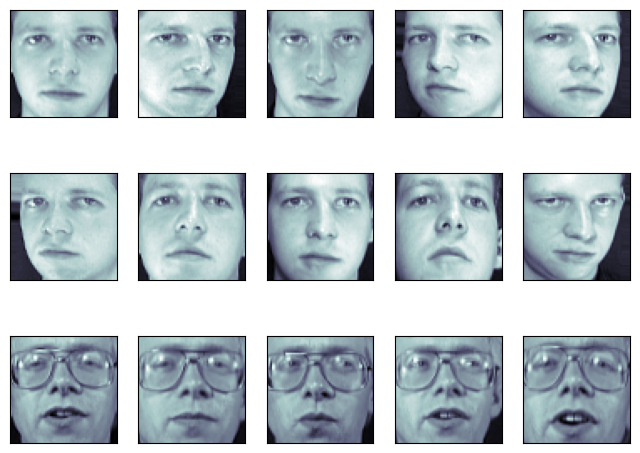

In [ ]:
#visualiser les données
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [ ]:
# faire la division du dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True, svd_solver='randomized')
pca.fit(X_train)

PCA(n_components=150, svd_solver='randomized', whiten=True)

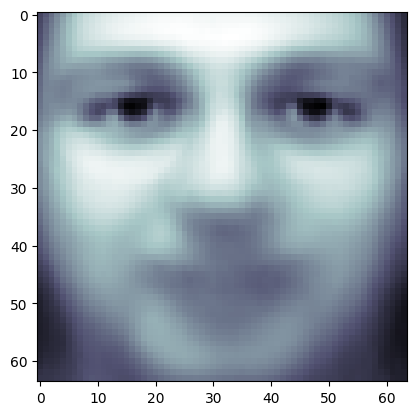

In [ ]:
# calcule le visage "moyen"
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone);

In [ ]:
print(pca.components_.shape)

(150, 4096)


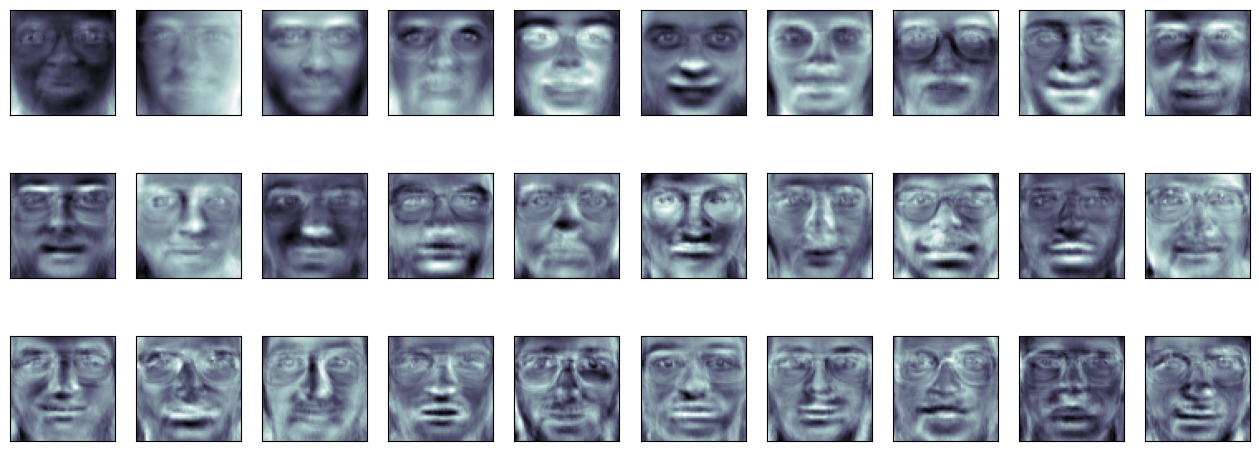

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

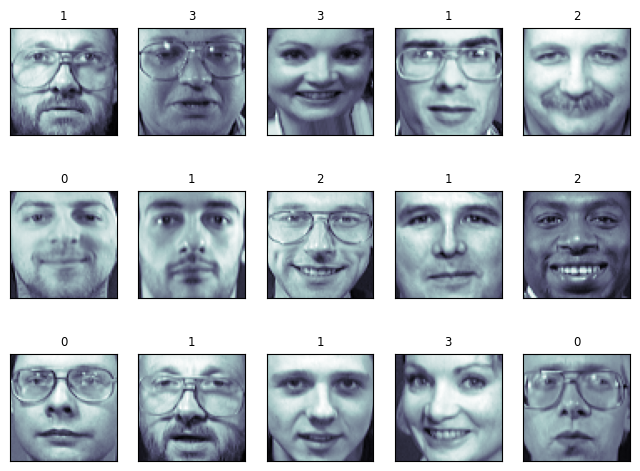

In [ ]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      0.83      0.91         6
          19       1.00      1.00      1.00         4
          20       0.50    

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
